In [1]:
import json
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pandas as pd
import glob
%matplotlib inline

sns.set(rc={'figure.figsize':(9, 3)})
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 600
BASE_PATH = os.path.abspath(os.path.join(os.getcwd(), os.pardir))

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42


In [2]:
dfs = []
for migsize in ['large', 'small']:
    for benchmark in ['native', 'mignificient_baremetal', 'mignificient_sarus']:
        for size in [4, 128, 512, 1024, 2048, 4096, 8192, 16384, 131072, 1048576, 2097152, 524288, 5242880]:
            df = pd.read_csv(f'../../data/microbenchmark/latency/{benchmark}/{migsize}/{size}_iters_100.txt',names=['rep', 'time'])
            df = df.iloc[1:]
            df['migsize'] = migsize
            df['size'] = size
            df['benchmark'] = benchmark
            dfs.append(df)

In [3]:
final_df = pd.concat(dfs)
final_df['time'] /= 1000.0
final_df['benchmark'] = final_df['benchmark'].map({'native': 'Native', 'mignificient_baremetal': 'MIGnificient, Bare metal', 'mignificient_sarus': 'MIGnificient, Sarus'})

final_df['size'] /= 1024.0

In [4]:
d = final_df.drop(['rep'], axis=1)
d = d.groupby(['migsize', 'size', 'benchmark']).mean().reset_index()
d.pivot(index='size',columns=['migsize', 'benchmark'])


time                                   \
migsize                        large                                    
benchmark   MIGnificient, Bare metal MIGnificient, Sarus       Native   
size                                                                    
0.003906                   26.673556           69.100384    16.367071   
0.125000                   26.980970           68.594535    16.463293   
0.500000                   27.012263           68.142848    16.130970   
1.000000                   27.361586           68.564121    16.743061   
2.000000                   27.145131           69.332960    16.627202   
4.000000                   27.677475           70.630808    17.186818   
8.000000                   28.001364           72.122586    17.717758   
16.000000                  32.228091           75.485000    19.905545   
128.000000                 61.870182          116.848283    52.325121   
512.000000                151.010333          229.903788   139.661747   
1024.000000               255.069737          375.967899   246.596505   
2048.000000               414.876414          575.551455   413.775657   
5120.000000               935.214859         1195.807455  1069.458566   

                                                                       
migsize                        small                                   
benchmark   MIGnificient, Bare metal MIGnificient, Sarus       Native  
size                                                                   
0.003906                   33.087838           86.052364    15.563283  
0.125000                   32.969576           86.027253    14.967354  
0.500000                   33.052828           86.875657    15.011091  
1.000000                   33.305717           86.399030    15.393182  
2.000000                   33.196384           86.708869    15.464879  
4.000000                   33.728303           90.478717    15.735354  
8.000000                   34.794071           90.719525    17.430293  
16.000000                  37.773747           95.172303    18.411798  
128.000000                 63.865657          131.421707    41.276384  
512.000000                149.965525          247.421879   125.778192  
1024.000000               263.111566          391.782687   231.881323  
2048.000000               467.609020          589.622232   403.881010  
5120.000000              1071.654798         1204.325980  1052.931010

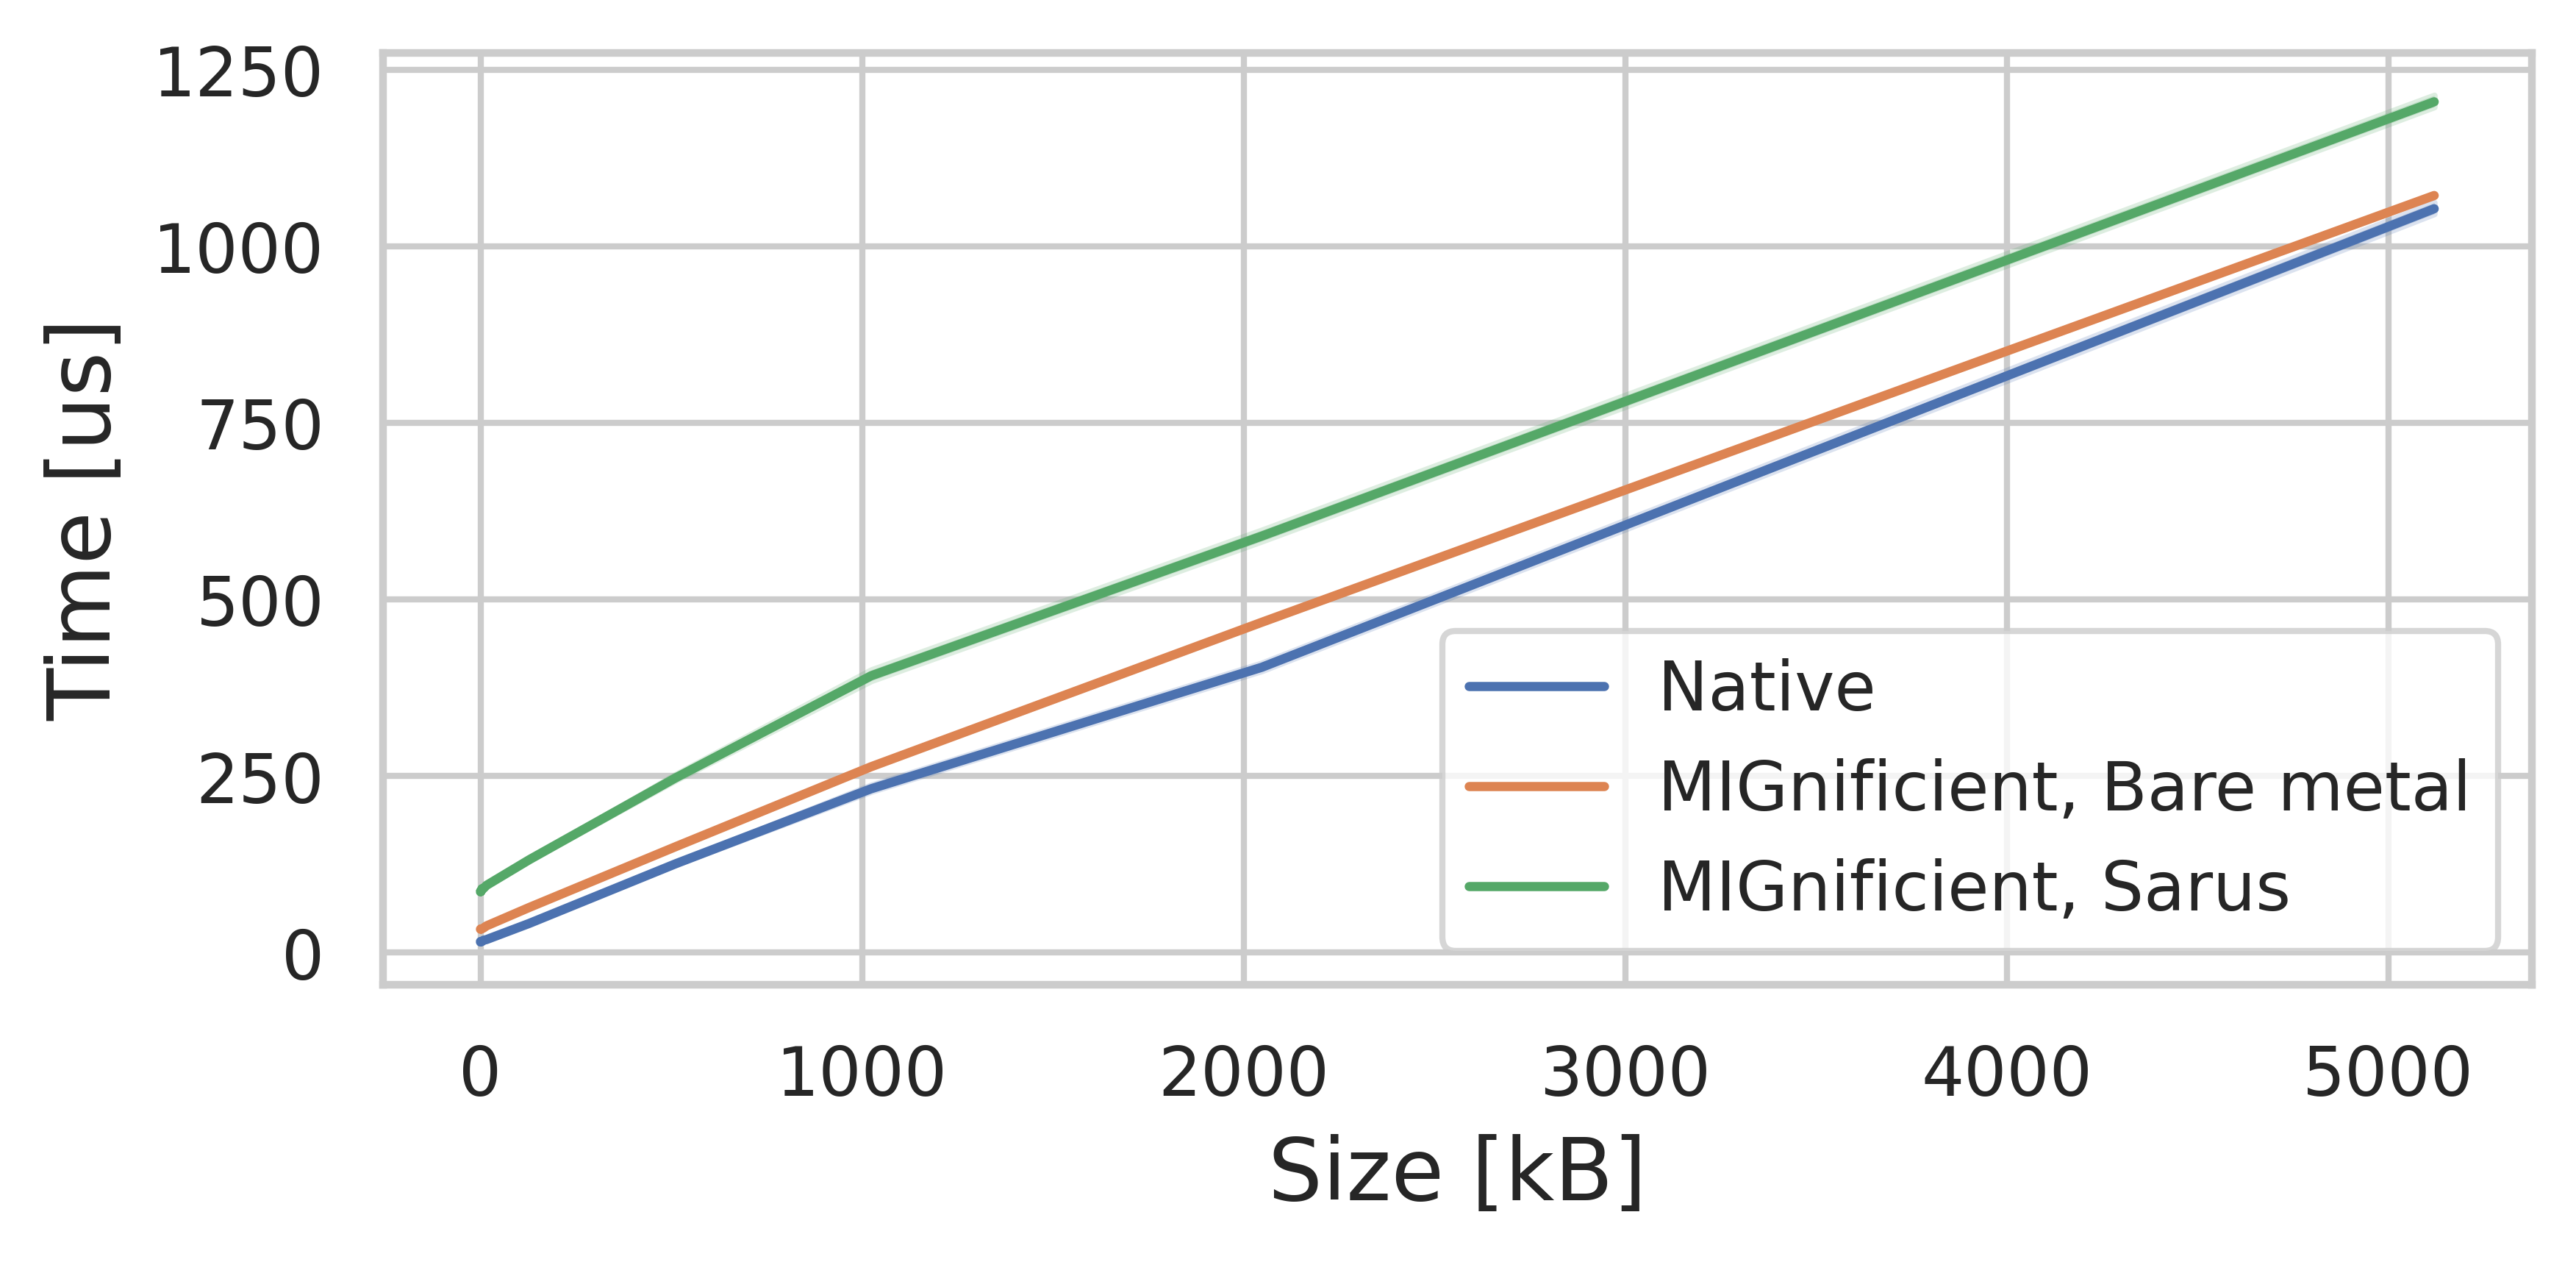

In [5]:

fig = plt.figure(figsize=(6,3))
ax = fig.gca()


g = sns.lineplot(data=final_df.loc[final_df['migsize'] == 'small'], x='size', y='time', hue='benchmark')
#g.set_xlabel('Co-located NAS benchmarks - (NAS application, input size, MPI ranks).',fontsize=14)
g.set_xlabel('Size [kB]',fontsize=14)
g.set_ylabel('Time [us]',fontsize=14)
#g.set_title('Slowdown of the batch job LULESH.',fontsize=16)
g.legend(title='', ncol=1, fontsize=11,title_fontsize=11, loc='lower right')
#plt.legend.set_title('LULESH problem size',prop={'fontsize':14})
#g.set_ylim([-4,6])
#g.axhline(y=0, color='black', linestyle='-')
#g.set_xlim([-0.5,5.5])
#g.set_xscale('log',base=2)
#g.set_xticks([0, 1024, 2048])
#g.set_xlim([0,1024])


plt.tight_layout()
plt.savefig("memcpy_latency_overhead_small.pdf",bbox_inches='tight',pad_inches = 0, transparent=False)


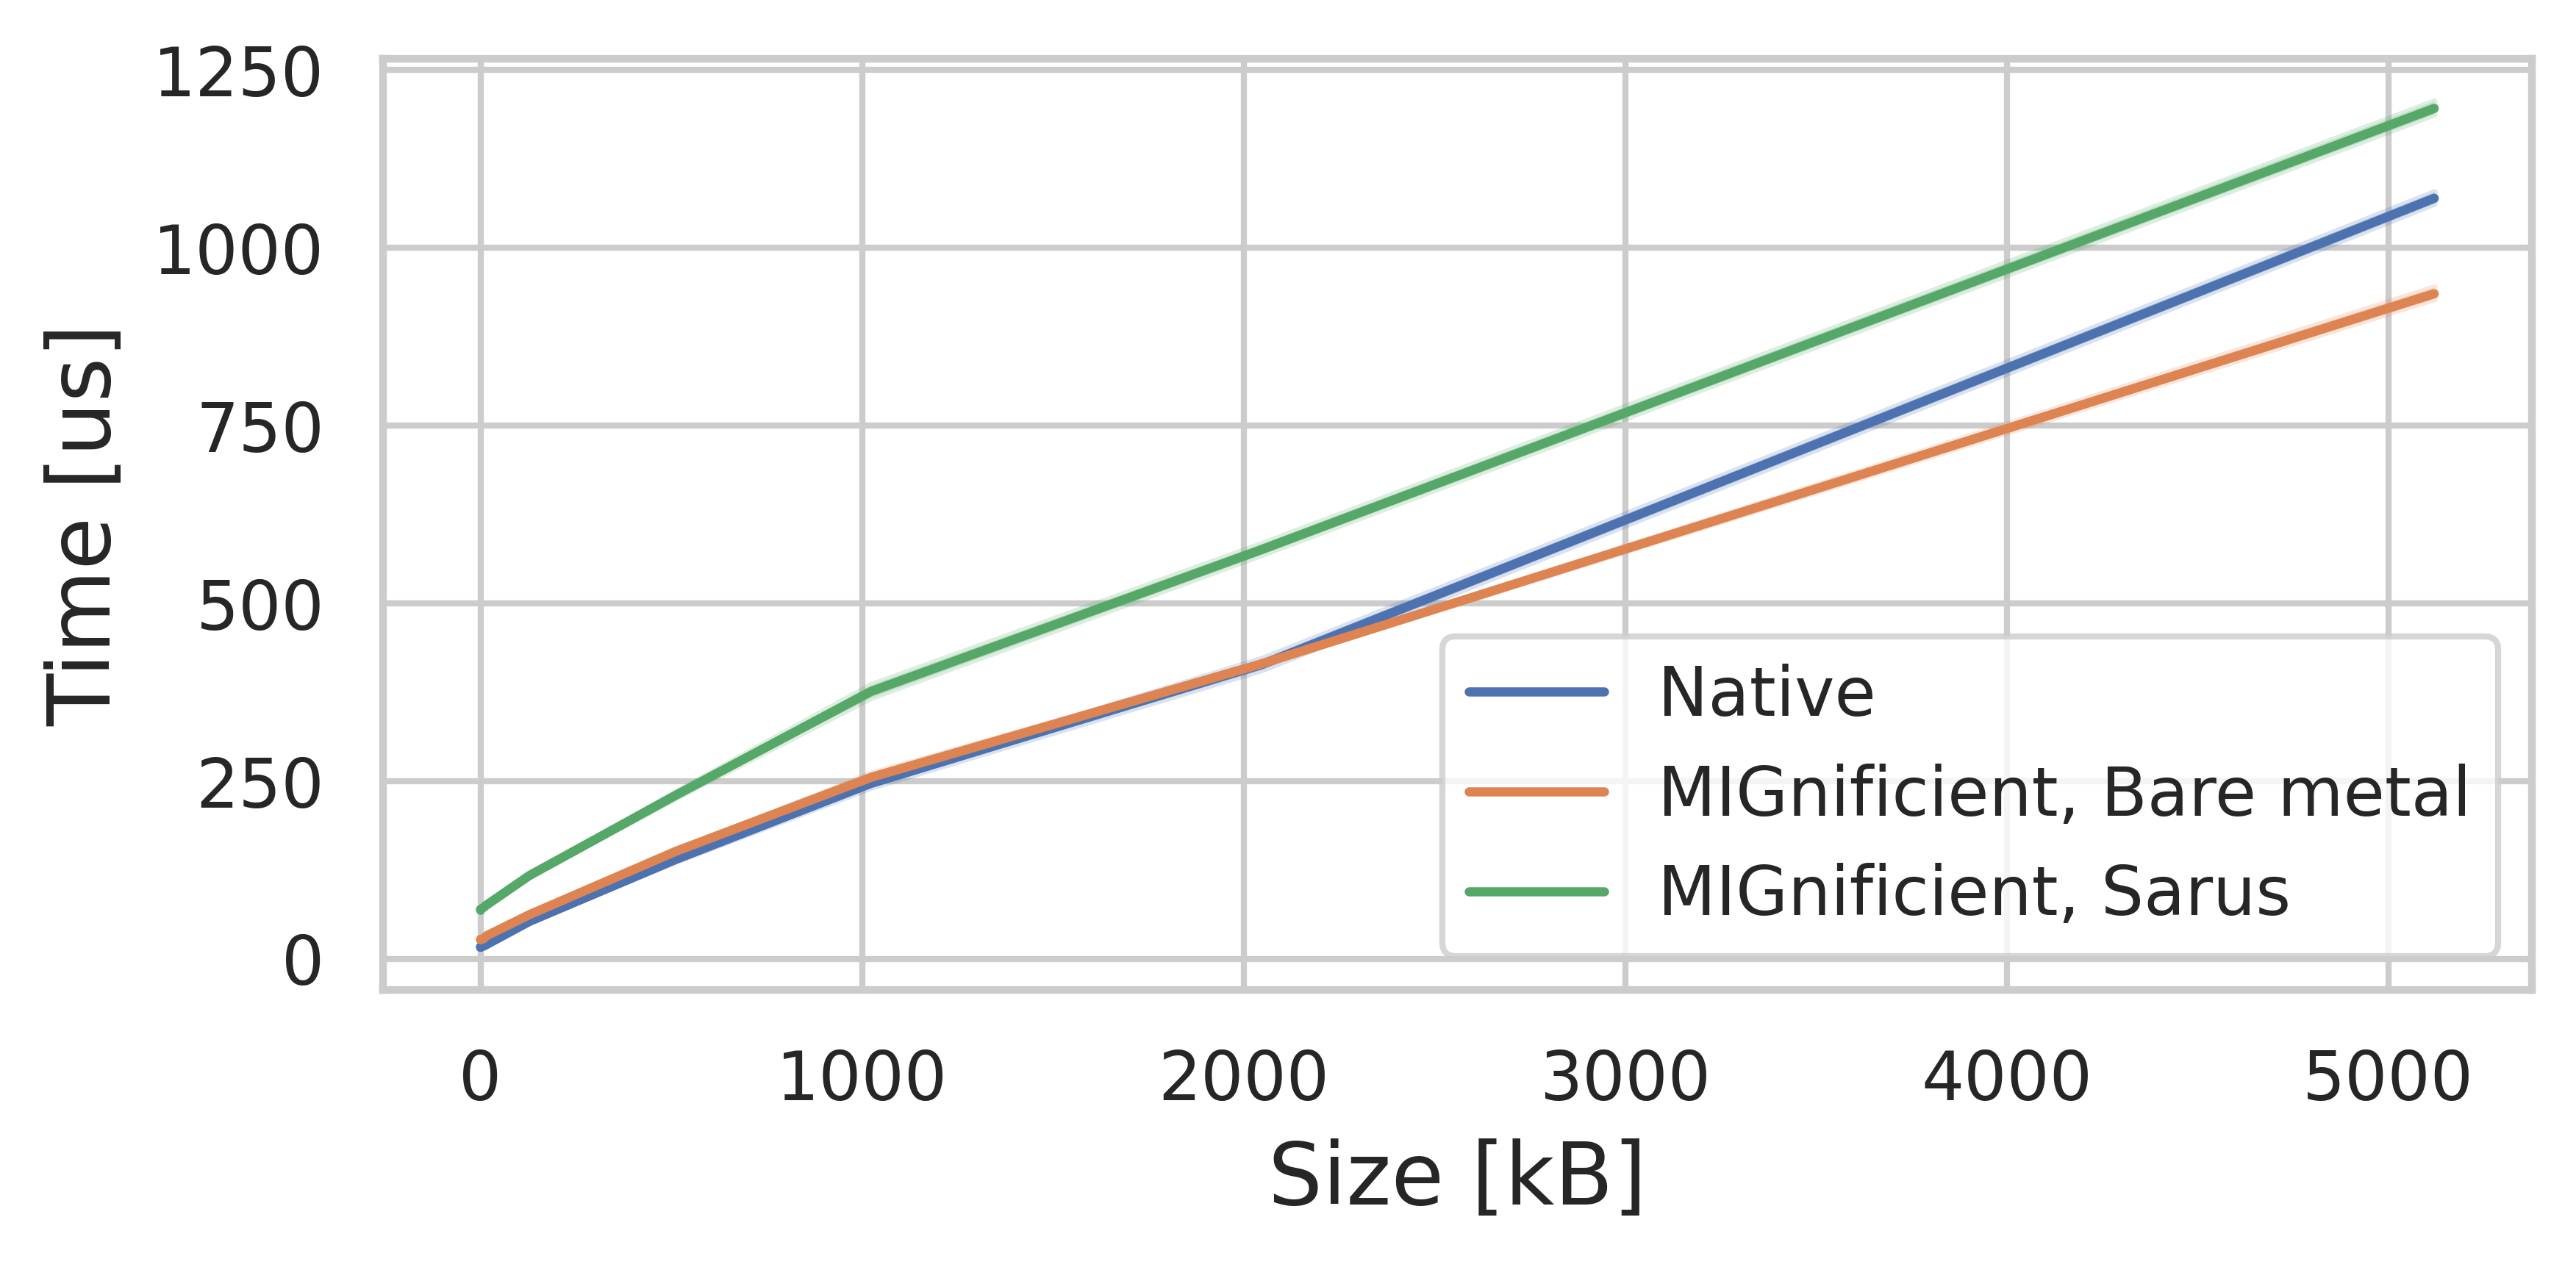

In [6]:

fig = plt.figure(figsize=(6,3))
ax = fig.gca()


g = sns.lineplot(data=final_df.loc[final_df['migsize'] == 'large'], x='size', y='time', hue='benchmark')
#g.set_xlabel('Co-located NAS benchmarks - (NAS application, input size, MPI ranks).',fontsize=14)
g.set_xlabel('Size [kB]',fontsize=14)
g.set_ylabel('Time [us]',fontsize=14)
#g.set_title('Slowdown of the batch job LULESH.',fontsize=16)
g.legend(title='', ncol=1, fontsize=11,title_fontsize=11, loc='lower right')
#plt.legend.set_title('LULESH problem size',prop={'fontsize':14})
#g.set_ylim([-4,6])
#g.axhline(y=0, color='black', linestyle='-')
#g.set_xlim([-0.5,5.5])


plt.tight_layout()
plt.savefig("memcpy_latency_overhead_large.pdf",bbox_inches='tight',pad_inches = 0, transparent=False)
#plt.savefig(os.path.join('plots', "cpu", "colocation_cpu_lulesh.pdf"),bbox_inches='tight',pad_inches = 0, transparent=False)
